In [1]:
import importlib

import settings
import VPINN_tri
import mesh_lib

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights
import os 

importlib.reload(settings)
importlib.reload(mesh_lib)
importlib.reload(VPINN_tri)

from settings import *
from mesh_lib import *
from VPINN_tri import *



os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

settings_lib imported 


2023-11-14 10:51:12.601944: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-14 10:51:12.603172: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 10:51:12.639995: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 10:51:12.641032: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 10:51:13.289473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

interpolator_lib imported
VPINN_tri_lib  imported
mesh_lib imported
settings_lib imported 
mesh_lib imported
VPINN_tri_lib  imported


basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

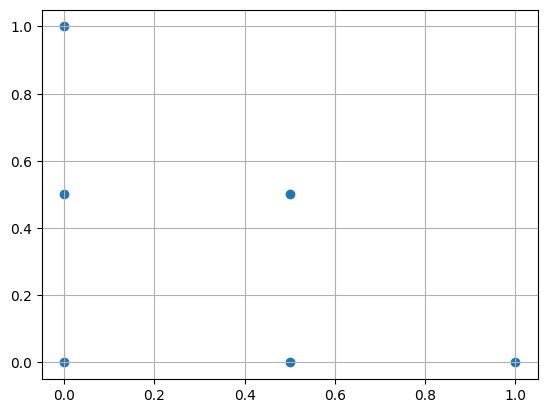

In [2]:
basis=interpolator(2,True,False,points=None)

{'vertices': array([[0.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 1.        ],
       ...,
       [0.95546869, 0.93374149],
       [0.02179855, 0.09375   ],
       [0.64887185, 0.56771425]]), 'vertex_markers': array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
 

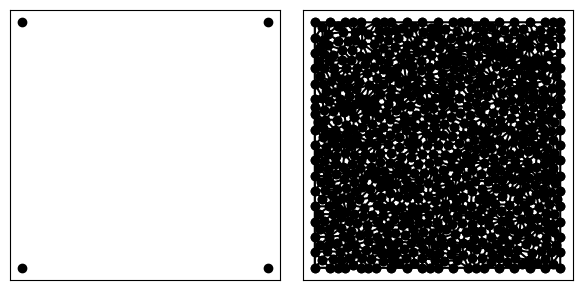

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr

# Step 1: Generate a fine mesh
A = dict(vertices=np.array(((0, 0), (1, 0), (1, 1), (0, 1))))
B = tr.triangulate(A,'qnea0.001')

tr.compare(plt, A, B)

print(B)

In [4]:
B['triangles']

array([[ 51,  16,  83],
       [ 53, 120,  99],
       [ 44, 209, 232],
       ...,
       [620, 806, 708],
       [144, 201, 807],
       [201,  65, 807]], dtype=int32)

In [5]:
B['edges']


array([[ 51,  16],
       [ 16,  83],
       [ 83,  51],
       ...,
       [793, 803],
       [803, 767],
       [201, 807]], dtype=int32)

[[ 16  51]
 [ 16  83]
 [ 51  83]
 ...
 [793 803]
 [767 803]
 [201 807]]


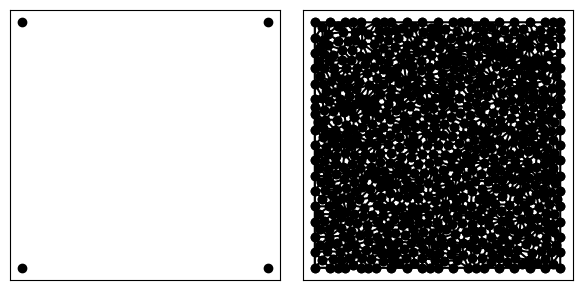

In [6]:
for i in range(len(B['edges'])):
    ii=B['edges'][i][0]
    jj=B['edges'][i][1]

    if ii>jj:
            B['edges'][i][0],B['edges'][i][1]=B['edges'][i][1],B['edges'][i][0]

tr.compare(plt, A, B)

print(B['edges'])

In [7]:
print(B['triangles'])

[[ 51  16  83]
 [ 53 120  99]
 [ 44 209 232]
 ...
 [620 806 708]
 [144 201 807]
 [201  65 807]]


In [8]:
print(B['edges'])

[[ 16  51]
 [ 16  83]
 [ 51  83]
 ...
 [793 803]
 [767 803]
 [201 807]]


In [9]:
print(B['triangles'])


def get_triangle_edges(triangle_vertices,edges):
    triangle_edges = []
 

    keep=np.zeros((3,),dtype=np.int32)

    for i in range(3):
        ii=triangle_vertices[i].copy()
        jj=triangle_vertices[(i + 1) % 3].copy()
        

        if(ii>jj):
            edge=np.array([jj,ii])
        else:
            edge=np.array([ii,jj])

        index= np.where(np.all(edges == edge, axis=1))[0][0]
        
        triangle_edges.append(index)

        if ii>jj:
            keep[i]=1

    triangle_edges=np.array(triangle_edges)
        
    return keep,triangle_edges


l=[]
temp=[]
for triangle in B['triangles']:
    keep,t=get_triangle_edges(triangle,B['edges'])
    l.append(keep)
    temp.append(t)



keep=np.asarray(l)
edges_index_inside_triangle=np.asarray(temp)




[[ 51  16  83]
 [ 53 120  99]
 [ 44 209 232]
 ...
 [620 806 708]
 [144 201 807]
 [201  65 807]]


In [10]:
B['keep']=keep
B['edges_index_inside_traingle']=edges_index_inside_triangle

In [11]:
B.keys()

dict_keys(['vertices', 'vertex_markers', 'triangles', 'neighbors', 'edges', 'edge_markers', 'keep', 'edges_index_inside_traingle'])

In [12]:
n_vertices=len(B['vertices'])
n_traingles=len(B['triangles'])
n_inside_edge=basis.n_inside_edge


vertices_contribution=np.zeros((n_vertices,1))
print(vertices_contribution)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [13]:
n_vertices=len(B['vertices'])
n_traingles=len(B['triangles'])
n_edges=len(B['edges'])

n_inside_edge=basis.n_inside_edge
n_inside=basis.n_inside

vertices_contribution=np.zeros((n_vertices,1))
edges_contribution=np.zeros((n_edges,n_inside_edge))
inside_contribution=np.zeros((n_traingles,n_inside))




for index,triangle in enumerate(B['triangles']):

    print(triangle)

    if (B['vertex_markers'][triangle[0]]==0):
            vertices_contribution[triangle[0]]=1
    else:
          vertices_contribution[triangle[0]]=2

    if (B['vertex_markers'][triangle[1]]==0):
            vertices_contribution[triangle[1]]=1
    else:
          vertices_contribution[triangle[1]]=2    

    if (B['vertex_markers'][triangle[2]]==0):
            vertices_contribution[triangle[2]]=1
    else:
          vertices_contribution[triangle[2]]=2

    
print(vertices_contribution)

    
                                   

[51 16 83]
[ 53 120  99]
[ 44 209 232]
[30 37 85]
[ 48  35 202]
[99 83 25]
[251  45  29]
[ 7 19 21]
[19  7 14]
[55 51  8]
[362 193 373]
[104 105  15]
[129 128  53]
[172 213 320]
[111  85  10]
[619 565 797]
[  6   5 134]
[632 638 105]
[113 100 102]
[129  25 131]
[21 23 27]
[14 10 80]
[80 10 81]
[27 17 42]
[ 15  13 104]
[173 251 180]
[112 132  49]
[131  43 130]
[90 18 40]
[ 24 101  34]
[97 80 36]
[106   9  93]
[14 80 97]
[256 375 119]
[ 7 21 47]
[19 14 97]
[257 295 337]
[33 93 26]
[72 91 17]
[97 24 34]
[19 23 21]
[574 571 589]
[25 83 16]
[71 11 91]
[34 19 97]
[40 98 13]
[ 45 140  61]
[23 19 34]
[ 50 148  21]
[343 255 341]
[165  87 168]
[42 41 61]
[ 56 264 225]
[  9 127 126]
[108 101  24]
[  9 122 127]
[ 31  94 114]
[ 34 101  33]
[113  55  31]
[198 243 231]
[107 149 148]
[ 40  51 102]
[22 93  9]
[27 42 50]
[94 30 86]
[129 110 128]
[37 55  8]
[267 237 165]
[174  66 158]
[569 229 141]
[291 267 165]
[51 40 18]
[88 11 89]
[  9 106 122]
[50 21 27]
[72 27 23]
[319  48 320]
[81  8 83]
[260 640 6

In [14]:
print(np.sum(B['vertex_markers']) *2+(n_vertices-np.sum(B['vertex_markers'])))

print(np.sum(vertices_contribution))



883
883.0
